<a href="https://colab.research.google.com/github/phmouras/Critical-Phenomena-in-gravitational-collapse-via-spectral-methods/blob/main/Eq_onda_matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import exp

# Pseudoespectral method for one dimensional wave equation


# tpsi + colpsi = 0;  unidimensional

#


N = 5

L0 = 1

col = np.cos(np.arange(N+1)*math.pi / (N))     # collocation points

# Mapping 1

#x = L0 * (col/(np.sqrt(1-col**2)))

#xcol = 2*L0**2/((L0**2/x**2-1)**2*x**3)             # dcol/dx

# Mapping 2

x = L0 * np.arctanh(col)

xcol = (1 - np.tanh(x/L0)**2)/L0  # dx/dcol

# Base Matrix (Tchebyshev Polinomials):

T = np.zeros([N+2,N+1])
#xT = np.zeros([N+2,N])
colT = np.zeros([N+2,N+1])


T[0,] = 1
T[1,] = col

for i in range(2,N+2):
  T[i,] = 2*col*T[i-1,] - T[i-2,]

# Derivada Matriz Base:

colT[0,] = 0
colT[1,] = 1

#xT[0,] = xcol*colT[0,]
#xT[1,] = xcol*colT[1,]

for i in range(2, N+2):
  colT[i,] = 2*col*colT[i-1,] + 2*T[i-1,] - colT[i-2,]
#  xT[i,] = xcol*colT[i,]                                                    # colT[i,] = dT[i,]/dcol, xcol = dcol/dx


psi = T[0:N+1,:]
#xpsi = xT[0:N,:]


# Initial conditions

u = (0.3)**(1/2)
#u = 1

f_0 = np.exp(-(col**2)/(u**2))              # exact solution in t=0 at collocation points



inv_psi = np.linalg.inv(psi)


a0 = np.dot(f_0, inv_psi)  # coeficients a(0)

phi = np.dot(a0, psi)      # exact solution in t=0





<ipython-input-16-cc4e0e050573>:28: RuntimeWarning: divide by zero encountered in arctanh
  x = L0 * np.arctanh(col)


In [17]:
np.shape(col)

(6,)

In [18]:
# Plot: Initial Conditions

M = 3000

#xplot = np.linspace(-2,2,M)

#colplot = np.tanh(xplot/L0)

colplot = np.linspace(-1,1,M)

Tplot = np.zeros([N+2,M])

Tplot[0,] = 1
Tplot[1,] = colplot


for i in range(2,N+2):
  Tplot[i,] = 2*colplot*Tplot[i-1,] - Tplot[i-2,]


psiplot = Tplot[0:N+1,:]


#f_plot0 = np.exp(-((xplot)**2)/(u)**2)

f_plot0 = np.exp(-((colplot)**2)/(u)**2)

#dtf_plot0 = (2*(xplot))*np.exp(-(xplot)**2/u**2)/u**2

phiplot = np.dot(a0, psiplot)

erro = abs(phiplot - f_plot0)

#dtphiplot = np.dot(da, psiplot)
#da01 = np.dot(dtf_k0, inv_psi)

#dtfplot = (1-np.tanh((xplot-x0)/np.sqrt(-u**2+1))**2)*u/np.sqrt(-u**2+1)

#dtphiplot = np.dot(da01, psiplot)

np.shape(f_plot0)

(3000,)

In [19]:
# Quadratura Gauss integration for L2_error

Nq = int(3/2*N)           # Quadrature truncation

gauss_quadrature = np.polynomial.legendre.leggauss(Nq)

new_col = gauss_quadrature[0]            # Legendre quadrature points


# Legendre Polinomials

wq_col = gauss_quadrature[1]    # Legendre weight (Verificado)

#xq = L0*(1+new_col)/(1-new_col)            # Physical quadrature domain [0,inf]

qT = np.zeros([Nq+2,Nq])
#qxT = np.zeros([N+2,Nq])
qcolT = np.zeros([Nq+2,Nq])


qT[0,] = 1
qT[1,] = new_col

for i in range(2,Nq+2):
  qT[i,] = 2*new_col*qT[i-1,] - qT[i-2,]

# Derivada Matriz Base:

qcolT[0,] = 0
qcolT[1,] = 1

#qxT[0,] = xq*qcolT[0,]
#qxT[1,] = xq*qcolT[1,]

for i in range(2,Nq+2):
  qcolT[i,] = 2*new_col*qcolT[i-1,] + 2*qT[i-1,] - qcolT[i-2,]
#  xT[i,] = xcol*colT[i,]

qpsi = qT[0:N+1,:]
col_qpsi = qcolT[0:N+1,:]
#rrqpsi = qrrSB[0:N+1,:]

qf_0 = np.exp(-(new_col**2)/(u**2))              # exact solution in t=0 at quadrature point

qphi = np.dot(a0, qpsi)      # exact solution in t=0 in quadrature points

qerror = abs(qphi-qf_0)


L2_error = ((1/2*np.dot(qerror**2,wq_col))**1/2)    # L2 error of HC in t=0




In [20]:
L2_error

0.0016016327513917632

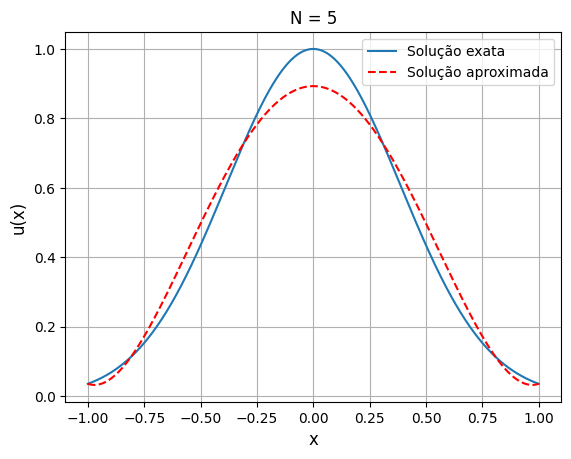

In [21]:
plt.plot(colplot, f_plot0, label = 'Solução exata')
plt.plot(colplot, phiplot,'--r', label = 'Solução aproximada')
 #                                   , linestyle=(1, (5, 10))) #  linestyle= ( marker type = int (A, B, C, D)) means (A pt line, B pt space, C pt line, D pt space)
plt.xlabel('x', fontsize = 12)
plt.ylabel('u(x)', fontsize = 12)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.legend()
plt.title(f'N = {N}')
plt.grid()

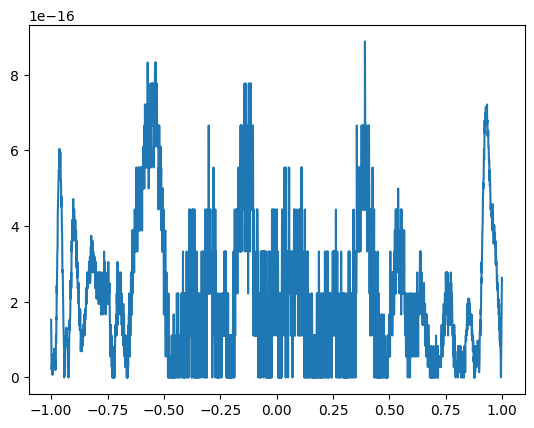

In [ ]:
plt.plot(colplot, erro)

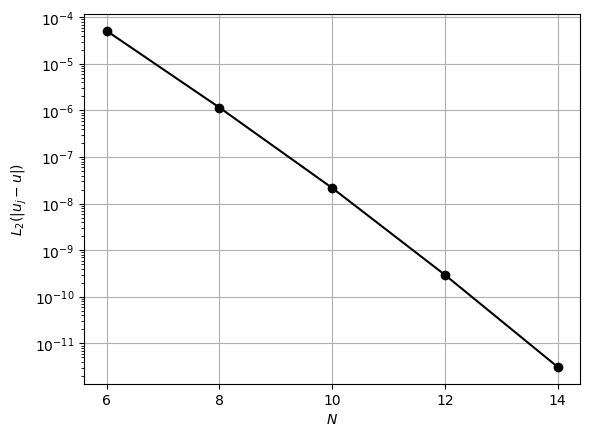

In [107]:
# Plot L2_error for L0 = 1 and N:

# L2_error for L0 = 1 and for N = 2,4,6,8,10



L2_error_6 = 5.101496260601563e-05
L2_error_8 = 1.1538176036182422e-06
L2_error_10 = 2.1701613682805872e-08
L2_error_12 = 2.964068637494716e-10
L2_error_14 = 3.130779546615595e-12

L2_error = [L2_error_6, L2_error_8,L2_error_10,L2_error_12,L2_error_14]

N_list = [6,8,10,12,14]

N_max = 14

plt.plot(N_list, L2_error,color='black' , marker ='o')
#plt.plot(N, L2HC_L04, '-rs',label = "L0 = 4")
#plt.plot(N, L2HC_L06, '-ko',label = "L0 = 6")
plt.xticks(N_list)
plt.xlabel('$N$')
plt.ylabel('$L_2(|u_j - u|)$')
plt.yscale('log')
plt.grid()
#plt.legend()
plt.show()

In [ ]:
# Temporal integration - Runge-Kutta 4th order

h = 0.01
tf = 100

It = int(tf/h)

t = np.linspace(0, tf, It)

phi_set = np.zeros([It,M])

#phi0_set = np.zeros([0,It])

for i in range(It):

  xphi = np.dot(a0, xpsi)
  da = np.dot(- xphi, inv_psi)
  K1 = h*(da)

  xphi = np.dot(a0 + K1/2, xpsi)
  da = np.dot(- xphi, inv_psi)
  K2 = h*(da)

  xphi = np.dot(a0 + K2/2, xpsi)
  da = np.dot(- xphi, inv_psi)
  K3 = h*(da)

  xphi = np.dot(a0 + K3, xpsi)
  da = np.dot(- xphi, inv_psi)
  K4 = h*(da)

  a0 = a0 + 1/6 * (K1 + 2*K2 + 2*K3 + K4)
  phi_set[i,:] = np.dot(a0, psiplot)


In [ ]:
L2_error_10 =

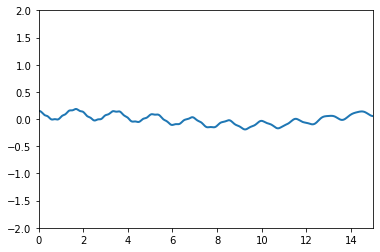

In [ ]:
# Animation plot

from matplotlib.animation import FuncAnimation
from IPython.display import HTML

fig = plt.figure()
ax = plt.axes(xlim=(0, 15), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

x = xplot

def init():
    line.set_data([], [])
    return line,

def animate(i):
  y = phi_set[i,:]
  line.set_data(x, y)
  return line,

anim = FuncAnimation(fig, animate, init_func=init,
                               frames=10000, interval=2, blit=True)

HTML(anim.to_html5_video())